<a href="https://colab.research.google.com/github/jgibbons94/cse480-notebooks/blob/master/09_2_Ponder_and_Prove_Recursively_Enumerable_and_Recursive_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Recursively Enumerable and Recursive Sets
## Due: Saturday, 27 February 2021, 11:59 pm

## TODO Exercise 14.4.1, RE and Recursive


Do the first six parts only (we'll do part 7 in class together).

1. Describe a decider to check whether the language of a given DFA $D$ is infinite.

The pumping lemma implies D will loop. If there is a path from the starting state to the loop to an accept state, then D's language is infinite.

Therefore, a decider that checks whether the language of a given DFA D is infinite would return true if a subset of the language starting somewhere in a pump is not empty. 

Therefore, a decider that checks whether the language of a given DFA D is infinite would traverse the graph with and keep track of the nodes it has visited. It would also follow the following rules for a given state:
1. If it has visited a given node before, it has discovered a loop. Change to state 2.
2.  It checks if any of the nodes in the loop is an accept state. If so, it returns true. If it can continue deeper into the graph out of the loop, change to state 3. Otherwise, change to state 1 when it backs out of the end of the loop.  
3. Continue keeping track of nodes it has visited, just like rule 1, except also immediately return true if it encounters an accept state.

2. Describe a decider to check whether a linear bounded automaton $L$ working on an input $w$ will go into an infinite loop.

Keep track of all states in a list. After each step the LBA takes, if the list contains the LBA's current state, contents of the tape, and header position relative to the start of the tape, return true. Otherwise, push the LBA's state, the current contents of the tape, and the position of the header relative to the start of the tape to the list. Continue until the LBA halts (the decider then returns false) or until there is a duplicate in the list (the decider then returns true).

3. Describe an enumerator for the language $Halt_{TM}$ similar to how the enumerator for $A_{TM}$ was designed.

* Keep listing pairs (A,B) of strings from $\Sigma^*$ on an “internal tape.”
* Keep checking whether A is a Turing machine description (e.g., our
markdown language for the TM has a parser; one can run this parser
and see if it accepts A). If so, A happens to be a Turing machine
description.
* Run Turing machine A on B, treating B as its input. Again, do not run
to completion; instead, engage in a dovetailed execution with all other
TMs and inputs meanwhile being enumerated internally.
* When the dovetailed simulation finds an (A,B) pair such that A halts on B, it lists the (A, B) pair on the output tape.
* This listing will produce every (M,w) such that M accepts w.
* The existence of this enumerator means that Halt_TM is RE.

4. Describe an enumerator for the language $\overline{L_{UnivCFG}}$.

* Keep listing grammars (G) from the set of all CFGs on an “internal tape.”
* When the dovetailed simulation finds a G such that L(G) is not $\Sigma^*$, it lists the G on the output tape.
* This listing will produce every G such that L(G) is not $\Sigma^*$.

5. Describe a semi-decider for whether or not a grammar $G_{1}$ has a language that is not contained in the language of another grammar $G_{2}$. That is, we must be able to enumerate all such pairs
$(G_{1}, G_{2})$ such that $L(G_{1}) \not \subseteq L(G_{2})$.

For every string in $L(G_1)$, find it in $L(G2)$. If such a string does not exist, then
$(G_{1}, G_{2})$ such that $L(G_{1}) \not \subseteq L(G_{2})$.

6. Suppose someone claims to have a decider for $L(G_{1}) \subseteq L(G_{2})$. Demonstrate how to build a reduction proof from $UnivCFG$. Draw a diagram similar to Figure 14.1 explaining your proof.

1. We know that $L_eqCFG$ and $G_Univ$ are impossible.

2. Show that $L_eqCFG$ or $G_Univ$ reduce to $L(G_{1}) \subseteq L(G_{2}$
- Assume the decider in question is called subsetG(G1, G2) for reference purposes.
-- ask the user for a grammar:
“May I please have your grammar – call it GUser; I will test for you whether it has a universal language.”
* Behind the scenes, construct the Turing machine: subsetG(Guser,Univ) where GUniv is a grammar for the universal language. Notice that the second argument is the user-given grammar.
* If subsetG determines that the grammars have the same language, it is indirectly answering yes – GUser has a universal
language—this is known to be impossible.
– Hence, subsetG cannot exist!

3. Conclude that $L(G_{1}) \subseteq L(G_{2})$ is impossible.
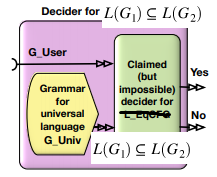

What [...] is mathematics? The answer, it appears, is that any argument which is carried out with sufficient precision is mathematical, and the reason that your friends and ours cannot understand mathematics is not because they have no head for figures, but because they are unable to **achieve the degree of concentration required to follow a moderately involved sequence of inferences**.


7. In 15.2.2, we will argue that $L_{AmbCFG}$ is not recursive. Assuming this result, argue that $\overline{L_{AmbCFG}}$ is not RE.


Recall Theorem 14.2.3:

If a language $L$ and its complement $\overline{L}$ are both RE, then $L$ is recursive.

We get to assume that $L_{AmbCFG}$ is not recursive.

Therefore, by the contrapositive of the Theorem, we know that it is NOT the case that both "$L_{AmbCFG}$ is RE" and "its complement $\overline{L_{AmbCFG}}$ is RE" can be true.

By DeMorgan's Law we translate that into the equivalent statement:

Either $L_{AmbCFG}$ is not RE, or $\overline{L_{AmbCFG}}$ is not RE.

In section 14.3.4 on pages 218 and 219, $L_{AmbCFG}$ is proven to be RE.

Therefore, $\overline{L_{AmbCFG}}$ must be the one that is not RE.